In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as spstats
%matplotlib inline

In [3]:
def load_survey(round_number, filename):
    df = pd.read_csv(filename, delimiter='\t', encoding='utf-16').drop([0,1])[[
        'IPAddress', 'participant_id', 'group_id', 'session_code', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4'
    ]]
    df['group_id'] = pd.to_numeric(df.group_id)
    df['participant_id'] = pd.to_numeric(df.participant_id)
    na = df.group_id.isna()
    df.loc[na, 'group_id'] = 100
    return df


In [4]:
df_a = load_survey(0, 'results/2018-12-21/Networked-Deliberation-01-A_December 21, 2018_11.41.tsv')
df_b = load_survey(1, 'results/2018-12-21/Networked-Deliberation-01-B_December 21, 2018_11.42.tsv')
df_c = load_survey(2, 'results/2018-12-21/Networked-Deliberation-01-C_December 21, 2018_11.43.tsv')
df_d = load_survey(3, 'results/2018-12-21/Networked-Deliberation-01-D_December 21, 2018_11.44.tsv')

df = pd.concat([df_a, df_b, df_c, df_d]).rename({
    "Q2_1": "item1_rank",
    "Q2_2": "item2_rank",
    "Q2_3": "item3_rank",
    "Q2_4": "item4_rank",
}, axis=1)

exclude_ids = set([1, 4])
participant_ids = set(df.participant_id)
df = df[df.participant_id.isin(participant_ids - exclude_ids)]

In [9]:
def ranked_to_ranks(alternatives):
    rank_alt = enumerate(alternatives)
    rank_alt = sorted(rank_alt, key=lambda x: x[1])
    ranks = [x[0] for x in rank_alt]
    return ranks

def get_preferences(df, exclude_id=[]):
    participant_ids = sorted(set(df.participant_id))
    preferences = {}
    for pid in participant_ids:
        if pid in exclude_id:
            continue
        participant_df = df[df.participant_id == pid].sort_values('group_id')
        preferences[pid] = []
        for i, group_id in enumerate(sorted(set(participant_df.group_id))):
            rank1 = list(participant_df.item1_rank)[i]
            rank2 = list(participant_df.item2_rank)[i]
            rank3 = list(participant_df.item3_rank)[i]
            rank4 = list(participant_df.item4_rank)[i]
            ranks = [(rank1, 1), (rank2, 2), (rank3, 3), (rank4, 4)]
            preference = [x[1] for x in sorted(ranks)]
            preferences[pid].append(preference)
    return preferences
   
preferences = get_preferences(df)
preferences

{2: [[4, 2, 3, 1], [4, 3, 2, 1], [4, 3, 2, 1], [4, 3, 2, 1]],
 3: [[3, 4, 2, 1], [1, 3, 2, 4], [1, 3, 4, 2], [1, 3, 4, 2]],
 5: [[1, 2, 3, 4], [1, 3, 4, 2], [1, 3, 4, 2], [1, 2, 4, 3]],
 6: [[3, 4, 2, 1], [3, 1, 4, 2], [3, 1, 2, 4], [1, 3, 4, 2]],
 7: [[3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1]],
 10: [[3, 1, 4, 2], [3, 1, 4, 2], [3, 1, 4, 2], [3, 4, 1, 2]],
 11: [[3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1]],
 12: [[2, 4, 1, 3], [2, 4, 1, 3], [2, 1, 4, 3], [2, 1, 4, 3]],
 13: [[3, 2, 4, 1], [3, 2, 4, 1], [3, 1, 2, 4], [3, 2, 1, 4]],
 14: [[4, 2, 3, 1], [3, 1, 2, 4], [3, 4, 2, 1], [3, 1, 2, 4]],
 15: [[4, 2, 3, 1], [3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1]],
 16: [[3, 1, 4, 2], [4, 3, 1, 2], [3, 1, 4, 2], [3, 4, 1, 2]],
 17: [[3, 4, 1, 2], [3, 4, 1, 2], [3, 4, 1, 2], [3, 4, 1, 2]],
 18: [[2, 3, 4, 1], [4, 2, 3, 1], [2, 3, 4, 1], [2, 4, 3, 1]],
 19: [[1, 2, 3, 4], [1, 3, 2, 4], [3, 1, 4, 2], [3, 1, 4, 2]],
 20: [[3, 1, 4, 2], [3, 1, 4, 2], [3, 1, 4, 2], [3, 1, 4, 2]

In [10]:
def get_profile(df, exclude_id=[]):
    preferences = get_preferences(df)
    num_rounds = len(list(preferences.values())[0])
    participants = preferences.keys()
    profiles = []
    for n in range(num_rounds):
        profile = {}
        profiles.append(profile)
        for p in participants:
            pref = preferences[p][n]
            try:
                profile[tuple(pref)] += 1
            except KeyError:
                profile[tuple(pref)] = 1
    return profiles
    
profiles = get_profile(df, exclude_id=[1, 4])

In [43]:
def print_preference_evolution(df):
    alternatives = sorted(set(sum([list(p.keys()) for p in profiles], [])))
    counts = []
    for alt in alternatives:
        line = [repr(alt)]
        for round_id in range(4):
            line.append(str(profiles[round_id].get(alt, '')))
        print('\t'.join(line))
print_preference_evolution(df)

(1, 2, 3, 4)	2			
(1, 2, 4, 3)				1
(1, 3, 2, 4)		2		
(1, 3, 4, 2)		1	2	2
(2, 1, 4, 3)			1	1
(2, 3, 4, 1)	1		1	
(2, 4, 1, 3)	1	1		
(2, 4, 3, 1)				1
(3, 1, 2, 4)		1	2	1
(3, 1, 4, 2)	3	3	4	2
(3, 2, 1, 4)				1
(3, 2, 4, 1)	1	1		
(3, 4, 1, 2)	1	1	1	3
(3, 4, 2, 1)	4	3	4	3
(4, 2, 3, 1)	3	1		
(4, 3, 1, 2)		1		
(4, 3, 2, 1)		1	1	1


In [44]:
def print_spearman_evolution(df):
    alternatives = sorted(set(sum([list(p.keys()) for p in profiles], [])))
    counts = []
    N = sum(profiles[0].values())
    for pref_a in alternatives:
        line = [repr(pref_a)]
        for round_id in range(4):
            total = 0
            for pref_b in alternatives:
                if pref_a == pref_b:
                    n = profiles[round_id].get(pref_a, 0) * (profiles[round_id].get(pref_b, 0) - 1) / 2
                else:
                    n = profiles[round_id].get(pref_a, 0) * profiles[round_id].get(pref_b, 0)
                a = ranked_to_ranks(pref_a)
                b = ranked_to_ranks(pref_b)
                r, p = spstats.spearmanr(a, b)
                total += r * n
            if total == 0:
                line.append('')
            else:
                line.append('{:+0.2f}'.format(total / (N*(N-1)/2)))
        print('\t'.join(line))
print_spearman_evolution(df)

(1, 2, 3, 4)	-0.10			
(1, 2, 4, 3)				-0.06
(1, 3, 2, 4)		-0.01		
(1, 3, 4, 2)		+0.02	+0.05	+0.03
(2, 1, 4, 3)			-0.08	-0.06
(2, 3, 4, 1)	+0.02		-0.01	
(2, 4, 1, 3)	-0.03	-0.07		
(2, 4, 3, 1)				-0.04
(3, 1, 2, 4)		+0.03	+0.09	+0.03
(3, 1, 4, 2)	+0.01	+0.12	+0.20	+0.08
(3, 2, 1, 4)				+0.02
(3, 2, 4, 1)	+0.04	+0.03		
(3, 4, 1, 2)	+0.03	+0.06	+0.06	+0.12
(3, 4, 2, 1)	+0.13	+0.11	+0.14	+0.09
(4, 2, 3, 1)	+0.01	-0.02		
(4, 3, 1, 2)		+0.03		
(4, 3, 2, 1)		+0.02	+0.01	+0.01


In [45]:
get_preferences(df)

{2: [[4, 2, 3, 1], [4, 3, 2, 1], [4, 3, 2, 1], [4, 3, 2, 1]],
 3: [[3, 4, 2, 1], [1, 3, 2, 4], [1, 3, 4, 2], [1, 3, 4, 2]],
 5: [[1, 2, 3, 4], [1, 3, 4, 2], [1, 3, 4, 2], [1, 2, 4, 3]],
 6: [[3, 4, 2, 1], [3, 1, 4, 2], [3, 1, 2, 4], [1, 3, 4, 2]],
 7: [[3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1]],
 10: [[3, 1, 4, 2], [3, 1, 4, 2], [3, 1, 4, 2], [3, 4, 1, 2]],
 11: [[3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1]],
 12: [[2, 4, 1, 3], [2, 4, 1, 3], [2, 1, 4, 3], [2, 1, 4, 3]],
 13: [[3, 2, 4, 1], [3, 2, 4, 1], [3, 1, 2, 4], [3, 2, 1, 4]],
 14: [[4, 2, 3, 1], [3, 1, 2, 4], [3, 4, 2, 1], [3, 1, 2, 4]],
 15: [[4, 2, 3, 1], [3, 4, 2, 1], [3, 4, 2, 1], [3, 4, 2, 1]],
 16: [[3, 1, 4, 2], [4, 3, 1, 2], [3, 1, 4, 2], [3, 4, 1, 2]],
 17: [[3, 4, 1, 2], [3, 4, 1, 2], [3, 4, 1, 2], [3, 4, 1, 2]],
 18: [[2, 3, 4, 1], [4, 2, 3, 1], [2, 3, 4, 1], [2, 4, 3, 1]],
 19: [[1, 2, 3, 4], [1, 3, 2, 4], [3, 1, 4, 2], [3, 1, 4, 2]],
 20: [[3, 1, 4, 2], [3, 1, 4, 2], [3, 1, 4, 2], [3, 1, 4, 2]

In [46]:
def print_participant_spearman_evolution(df):
    preferences = get_preferences(df)
    profiles = get_profile(df)
    participants = sorted(set(df.participant_id))
    N = len(participants)
    for part in participants:
        line = [repr(part)]
        for round_id in range(4):
            pref_a = preferences[part][round_id]
            total = 0
            alternatives = profiles[round_id].keys()
            for pref_b in alternatives:
                n = profiles[round_id].get(pref_b, 0)
                if pref_a == pref_b:
                    n -= 1
                a = ranked_to_ranks(pref_a)
                b = ranked_to_ranks(pref_b)
                r, p = spstats.spearmanr(a, b)
                total += r * n
            if total == 0:
                line.append('')
            else:
                line.append('{:+0.2f}'.format(total / (N*(N-1)/2)))
        print('\t'.join(line))
print_participant_spearman_evolution(df)

2	+0.02	+0.03	+0.02	+0.02
3	+0.05	+0.01	+0.04	+0.03
5	-0.04	+0.03	+0.04	-0.05
6	+0.05	+0.06	+0.06	+0.03
7	+0.05	+0.05	+0.06	+0.05
10	+0.02	+0.06	+0.07	+0.06
11	+0.05	+0.05	+0.06	+0.05
12	-0.02	-0.06	-0.07	-0.06
13	+0.05	+0.04	+0.06	+0.03
14	+0.02	+0.04	+0.06	+0.04
15	+0.02	+0.05	+0.06	+0.05
16	+0.02	+0.04	+0.07	+0.06
17	+0.04	+0.06	+0.07	+0.06
18	+0.03	-0.01	-0.00	-0.03
19	-0.04	+0.01	+0.07	+0.05
20	+0.02	+0.06	+0.07	+0.05


In [14]:
def score_majority(profile):
    votes = {}
    for pref, count in profile.items():
        top = pref[0]
        try:
            votes[top] += count
        except KeyError:
            votes[top] = count
    return votes

def social_preference_majority(profile):
    score = score_majority(profile)
    ordered_scores = sorted(score.items(), reverse=True, key=lambda x: x[1])
    social_preference = []
    last_score = ordered_scores[0][1]
    current_set = set()
    for alternative, score in ordered_scores:
        # If the score has changed, create a new set of alternatives
        if score == last_score:
            current_set.add(alternative)
        else:
            social_preference.append(current_set)
            current_set = set([alternative])
        last_score = score
    social_preference.append(current_set)
    return social_preference

def social_choice_majority(profile):
    social_preference = social_preference_majority(profile)
    return social_preference[0]

for p in profiles:
    print(social_choice_majority(p), social_preference_majority(p))

{3} [{3}, {4}, {1, 2}]
{3} [{3}, {1, 4}, {2}]
{3} [{3}, {1, 2}, {4}]
{3} [{3}, {1}, {2}, {4}]


In [19]:
def borda_count(profile):
    borda = {}
    for pref, count in profile.items():
        for i, alternative in enumerate(reversed(pref)):
            try:
                borda[alternative] += i * count
            except KeyError:
                borda[alternative] = i * count
    return borda

def social_preference_borda(profile):
    borda = borda_count(profile)
    ordered_scores = sorted(borda.items(), key=lambda x: x[1], reverse=True)
    social_preference = []
    last_score = ordered_scores[0][1]
    current_set = set()
    for alternative, score in ordered_scores:
        # If the score has changed, create a new set of alternatives
        if score == last_score:
            current_set.add(alternative)
        else:
            social_preference.append(current_set)
            current_set = set([alternative])
        last_score = score
    social_preference.append(current_set)
    return social_preference

def social_choice_borda(profile):
    return social_preference_borda(profile)[0]

for profile in profiles:
    print(social_choice_borda(profile), social_preference_borda(profile))

{3} [{3}, {4}, {2}, {1}]
{3} [{3}, {4}, {1}, {2}]
{3} [{3}, {1, 4}, {2}]
{3} [{3}, {4}, {1}, {2}]


In [20]:
import itertools
def score_tideman(profile):
    alternatives = set(sum([list(pref) for pref in profile.keys()], []))
    pairs = set(itertools.product(alternatives, alternatives))
    for alt in alternatives:
        pairs.remove((alt, alt))
    margins = dict((contest, 0) for contest in pairs)
    for pref, count in profile.items():
        for win in range(len(pref)):
            for lose in range(win + 1, len(pref)):
                margins[(pref[win], pref[lose])] += count
    return margins
        

import networkx as nx
def tideman_graph(profile):
    margins = score_tideman(profile)
    ordered_margins = sorted(margins.items(), key=lambda x: x[1], reverse=True)
    G = nx.DiGraph()
    counted = 0
    skipped = 0
    for contest, margin in ordered_margins:
        s, t = contest
        try:
            if nx.has_path(G, t, s):
                # Skip contest, would create cycle
                skipped += margin
                continue
        except nx.NodeNotFound:
            pass
        # Add node to graph
        G.add_edge(s, t)
        counted += margin
    return G, counted, skipped

def social_preference_tideman(profile):
    G, counted, skipped = tideman_graph(profile)
    root = next(nx.topological_sort(G))
    social_preference = []
    done = set()
    shell = set([root])
    while len(shell) > 0:
        next_shell = set()
        # Remove alternatives ranked lower than others in shell
        for s in list(shell):
            for t in list(shell):
                if G.has_edge(s, t):
                    shell.remove(t)
        # Update list of completed alternatives
        done = done | shell
        # Build next shell
        for s in shell:
            next_shell = (next_shell | set(G.successors(s))) - done
        # Add current shell to preference
        social_preference.append(shell)
        shell = next_shell
    return social_preference

def social_choice_tideman(profile):
    return social_preference_tideman(profile)[0]

def concurrence_tideman(profile):
    G, counted, skipped = tideman_graph(profile)
    return counted / (counted + skipped)

for p in profiles:
    print(social_preference_tideman(p))

[{3}, {4}, {2}, {1}]
[{3}, {4}, {1}, {2}]
[{3}, {1}, {4}, {2}]
[{3}, {4}, {1}, {2}]


## Group-level

In [11]:
groups = sorted(set(df.group_id) - set([100.0]))
group_profile = {}

for g in groups:
    dfg = df[df.group_id == g]
    group_profile[g] = get_profile(dfg, exclude_id=[1, 4])

In [22]:
group_majority = {}
for g in groups:
    group_majority[g] = [
        social_choice_majority(p) for p in group_profile[g]]
group_majority

{13.0: [{3}],
 14.0: [{1, 3, 4}],
 15.0: [{3}],
 16.0: [{3}],
 17.0: [{4}],
 18.0: [{3}],
 19.0: [{3}],
 20.0: [{3}],
 21.0: [{1, 3}],
 22.0: [{3}],
 23.0: [{3}],
 24.0: [{3}]}

In [23]:
group_borda = {}
for g in groups:
    group_borda[g] = [
        social_choice_borda(p) for p in group_profile[g]]
group_borda

{13.0: [{3}],
 14.0: [{2, 3, 4}],
 15.0: [{3}],
 16.0: [{3}],
 17.0: [{3}],
 18.0: [{3}],
 19.0: [{3}],
 20.0: [{3}],
 21.0: [{3}],
 22.0: [{3}],
 23.0: [{3}],
 24.0: [{3}]}

In [24]:
group_tideman = {}
for g in groups:
    group_tideman[g] = [
        social_choice_tideman(p) for p in group_profile[g]]
group_tideman

{13.0: [{3}],
 14.0: [{4}],
 15.0: [{3}],
 16.0: [{3}],
 17.0: [{4}],
 18.0: [{3}],
 19.0: [{3}],
 20.0: [{3}],
 21.0: [{1}],
 22.0: [{3}],
 23.0: [{3}],
 24.0: [{3}]}

## Concurrence

In [50]:
def sample_to_profile(sample):
    profile = dict()
    # Walk through sorted list of samples
    # Walks through once total, faster than using count() many times
    ordered_sample = sorted(sample)
    current_alt = ordered_sample[0]
    current_count = 0
    for x in ordered_sample:
        if x != current_alt:
            profile[current_alt] = current_count
            current_count = 1
            current_alt = x
        else:
            current_count += 1
    profile[current_alt] = current_count
    return profile

In [51]:
def bootstrap_profile(profile):
    population = sum([[alt] * i for alt, i in profile.items()], [])
    k = len(population)
    sample = [
        population[random.randint(0, k - 1)]
        for i in range(k)]
    profile = sample_to_profile(sample)
    return profile

In [52]:
def concurrence_spearman(profile):
    total = 0
    count = 0
    for pref_a, count_a in profile.items():
        for pref_b, count_b in profile.items():
            if repr(pref_a) == repr(pref_b):
                continue
            a = ranked_to_ranks(pref_a)
            b = ranked_to_ranks(pref_b)
            r, p = spstats.spearmanr(a, b)
            total += count_a * count_b * r
            count += count_a * count_b
    return total / count

def concurrence_bootstrap(profile, f, N=1000, sigma=1.0):
    estimates = [
        f(bootstrap_profile(profile))
        for n in range(N)]
    error = np.std(estimates)
    return sigma * error

def concurrence_kendall(profile):
    total = 0
    count = 0
    for pref_a, count_a in profile.items():
        for pref_b, count_b in profile.items():
            if repr(pref_a) == repr(pref_b):
                continue
            a = ranked_to_ranks(pref_a)
            b = ranked_to_ranks(pref_b)
            tau, p = spstats.kendalltau(a, b)
            total += count_a * count_b * tau
            count += count_a * count_b
    return total / count


            

In [53]:
spearman = []
for p in profiles:
    c = concurrence_spearman(p)
    c_err = concurrence_bootstrap(p, concurrence_spearman, N=1000)
    spearman.append(c)
    print('{:0.4f} +/- {:0.4f}'.format(c, c_err))

-0.0019 +/- 0.1388
0.1434 +/- 0.1260
0.1962 +/- 0.1445
0.0893 +/- 0.1490


In [35]:
kendall = []
for p in profiles:
    c = concurrence_kendall(p)
    c_err = concurrence_bootstrap(p, concurrence_kendall, N=1000)
    kendall.append(c)
    print('{:0.4f} +/- {:0.4f}'.format(c, c_err))

0.0031 +/- 0.1116
0.1003 +/- 0.1097
0.1541 +/- 0.1234
0.0565 +/- 0.1208


In [36]:
tideman = []
for p in profiles:
    c = concurrence_tideman(p)
    c_err = concurrence_bootstrap(p, concurrence_tideman, N=1000)
    tideman.append(c)
    print('{:0.4f} +/- {:0.4f}'.format(c, c_err))


0.6875 +/- 0.0558
0.6979 +/- 0.0483
0.7396 +/- 0.0499
0.6771 +/- 0.0570


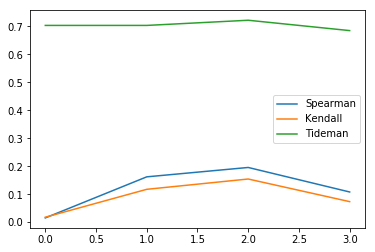

In [15]:
plt.plot(spearman, label='Spearman')
plt.plot(kendall, label='Kendall')
plt.plot(tideman, label='Tideman')
plt.legend()

## Group Level Analysis

In [20]:
groups = [
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24]
]

In [79]:
df['round_id'] = 0
df.loc[df.group_id == 100.0, 'round_id'] = 3
df.loc[df.group_id < 99, 'round_id'] = 2
df.loc[df.group_id < 21, 'round_id'] = 1
df.loc[df.group_id < 17, 'round_id'] = 0

In [87]:
def get_group_profiles(df, group_id):
    # Construct data frame for group
    df_group = df[df.group_id == group_id]
    participant_ids = set(df_group.participant_id)
    round_id = list(df_group.round_id)[0]
    next_round_id = round_id + 1
    df_next = df[
        df.participant_id.isin(participant_ids)
        & (df.round_id == next_round_id)]
    
    profile = {}
    for pid in participant_ids:
        participant_df = df_group[df_group.participant_id == pid]
        rank1 = list(participant_df.item1_rank)[0]
        rank2 = list(participant_df.item2_rank)[0]
        rank3 = list(participant_df.item3_rank)[0]
        rank4 = list(participant_df.item4_rank)[0]
        ranks = [(rank1, 1), (rank2, 2), (rank3, 3), (rank4, 4)]
        preference = tuple([x[1] for x in sorted(ranks)])
        try:
            profile[preference] += 1
        except KeyError:
            profile[preference] = 1
    
    next_profile = {}
    for pid in participant_ids:
        participant_df = df_next[df_next.participant_id == pid]
        rank1 = list(participant_df.item1_rank)[0]
        rank2 = list(participant_df.item2_rank)[0]
        rank3 = list(participant_df.item3_rank)[0]
        rank4 = list(participant_df.item4_rank)[0]
        ranks = [(rank1, 1), (rank2, 2), (rank3, 3), (rank4, 4)]
        preference = tuple([x[1] for x in sorted(ranks)])
        try:
            next_profile[preference] += 1
        except KeyError:
            next_profile[preference] = 1
    return (profile, next_profile)


In [91]:
print("Round\tGroup\tC\tC_next\tChange")
for round_id, round_groups in enumerate(groups):
    for g in round_groups:
        profile, next_profile = get_group_profiles(df, g)
        c = concurrence_spearman(profile)
        c_next = concurrence_spearman(next_profile)
        print(round_id, '\t', g, '\t', '{:+0.2f}\t{:+0.2f}\t{:+0.2f}'.format(c, c_next, c_next - c))

Round	Group	C	C_next	Change
0 	 13 	 +0.10	+0.04	-0.06
0 	 14 	 -0.40	+0.73	+1.13
0 	 15 	 +0.30	+0.64	+0.34
0 	 16 	 -0.23	+0.10	+0.33
1 	 17 	 -0.10	-0.40	-0.30
1 	 18 	 +0.67	+0.67	+0.00
1 	 19 	 -0.14	-0.16	-0.02
1 	 20 	 +0.48	+0.20	-0.28
2 	 21 	 +0.20	-0.20	-0.40
2 	 22 	 +0.60	+0.60	+0.00
2 	 23 	 +0.20	+0.20	+0.00
2 	 24 	 -0.44	-0.17	+0.27


In [81]:
df_group = df[df.group_id == 21]
participant_ids = set(df_group.participant_id)
round_id = list(df_group.round_id)[0]
next_round_id = round_id + 1
df_next = df[
    df.participant_id.isin(participant_ids)
    & (df.round_id == next_round_id)]


In [128]:
df[df.participant_id == 5]

,IPAddress,participant_id,group_id,session_code,item1_rank,item2_rank,item3_rank,item4_rank,round,round_id
8,141.211.133.180,5,14.0,k7t2tuxk,1,2,3,4,0.0,0
2,141.211.133.180,5,18.0,k7t2tuxk,1,4,2,3,1.0,1
7,141.211.133.180,5,21.0,k7t2tuxk,1,4,2,3,2.0,2
8,141.211.133.180,5,100.0,NaN,1,2,4,3,2.0,3


In [74]:
df_next

,IPAddress,participant_id,group_id,session_code,item1_rank,item2_rank,item3_rank,item4_rank,round,round_id
